<a href="https://colab.research.google.com/github/Somu112/NLP/blob/main/Trump_Tweet_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Nov  2 01:17:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Text Pre-Processing**

Text pre-processing is technique of deriving meaningful information from Natural text for further analysis using NLP.

It usually involves the process of structuring the input text. deriving patters within the structure data. and finally evaluating and interpreting the output.

**Scenario 1. Trump Tweet Analysis using NLP**

**Topic Covered**
  * Tokenization
  * Ngram
  * Stemming
  * Lemmatization
  * Stop words removal
  * POS tags
  * Named Entity Recognition(NER)

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("words")
nltk.download("maxent_ne_chunker")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk

In [5]:
!wget https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv?dl=0

--2021-11-02 01:17:40--  https://www.dropbox.com/s/v0gmlmnxiqt1vga/Donald-Tweets%21.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv [following]
--2021-11-02 01:17:41--  https://www.dropbox.com/s/raw/v0gmlmnxiqt1vga/Donald-Tweets%21.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4595af8ee665aae8fa75b373e8.dl.dropboxusercontent.com/cd/0/inline/BZIUQQip10ggh0syJJOqaCknTa14ABkcwsBjQqFsLpbBPTwLlOjulaZWvEqL9-zSQ9DJcfW3cUrCdKiMY53JaIliMWV8iGhpy1V4csWzXhzY6cuzSoOBaduhB33H87Jv3owr7XgAUR6gd-5k9VFEfFb_/file# [following]
--2021-11-02 01:17:41--  https://uc4595af8ee665aae8fa75b373e8.dl.dropboxusercontent.com/cd/0/inline/BZIUQQip10ggh0syJJOqaCknTa14ABkcwsBjQqFsLpbBPTwLlOjulaZWvE

In [6]:
tweet = pd.read_csv("Donald-Tweets!.csv?dl=0")
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [7]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       7375 non-null   object 
 1   Time                                       7375 non-null   object 
 2   Tweet_Text                                 7375 non-null   object 
 3   Type                                       7375 non-null   object 
 4   Media_Type                                 1225 non-null   object 
 5   Hashtags                                   2031 non-null   object 
 6   Tweet_Id                                   7375 non-null   float64
 7   Tweet_Url                                  7375 non-null   object 
 8   twt_favourites_IS_THIS_LIKE_QUESTION_MARK  7375 non-null   int64  
 9   Retweets                                   7375 non-null   int64  
 10  Unnamed: 10             

In [8]:
tweet.drop(columns=["Unnamed: 10","Unnamed: 11"],inplace=True)

In [9]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688


In [10]:
import re

**Ques. Find out how often did trump tweet in 2017**

In [11]:
tweet_by_date = tweet.copy()
tweet_by_date['Date'] = pd.to_datetime(tweet['Date'], yearfirst=True)
tweet_by_date['Date'] = tweet_by_date['Date'].dt.month
tweet_by_date = pd.DataFrame(tweet_by_date.groupby(['Date']).size().sort_values(ascending=True).rename('Tweets'))
tweet_by_date

,Tweets
Date,
6,258
4,287
5,357
3,456
1,507
2,516
12,579
11,709
8,726


We can see that he tweetted more in the tenth month of 2017

****Ques3: Clean the data(Use function from python library such as re, string and NLTK to remove these unnecessary elements) and store cleaned data as a seperate column to the DataFrame**

Observe that the tweet contains various elements such as 'punctuations marks' Use functions from python libraries such as re, string and NLTK to remove these unnecessary elements

In [12]:
import string, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [13]:
def clean_text(tweet):
  tweet = word_tokenize(tweet) #create token
  tweet = tweet[4:] # remove RT@
  tweet = " ".join(tweet) # Join Tokens
  tweet = re.sub("https",'',tweet) # Remove 'https' txts with blanks
  tweet = [char for char in tweet if char not in string.punctuation] # Remove punctuantion
  tweet = ''.join(tweet) # join the letter
  tweet = [word for word in tweet.split() if word.lower() not in stopwords.words("english")]
  return " ".join(tweet)

In [14]:
tweet['cleaned_text'] = tweet['Tweet_Text'].apply(clean_text)

In [15]:
tweet['cleaned_text'].head()

0    deepest gratitude served armed forces ThankAVe...
1    New York soon making important decisions peopl...
2    small groups protesters last night passion gre...
3    open successful presidential election professi...
4    DC Met President Obama first time Really good ...
Name: cleaned_text, dtype: object

**Ques4: Process the data to remove elements which may cause isssue in analysis and store processed data as a separate column to the DataFrame**

Apart from cleaning, data also needs to be processed to remove elements which may cause isssue in analysis. Examle of such elements are 'single characters'. multiple spaces'. 'upper-cased''apply various text pre-processing technique ne-by-one to the cleaned data
  * Remove all the special characters
  * remove single charecters appearing in the text except the start
  * Remove single characters appearing at te start
  * Substitute multiple spaces with a single cases Convert to Lowercase

In [16]:
features = tweet['cleaned_text']
processed_features = []

for sentence in range(0, len(features)):
  # Remove all the special charcters
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

  # Remove single characters appearing in the text except the start
  processed_feature = re.sub(r'\s+[a-zA-Z]\s+',' ', processed_feature)

  # Remove single characters appearing at the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

  # Substitute multiple spaces with a single spaces
  processed_feature = re.sub(r'\s+', ' ', processed_feature)

  # convert to the lowercase
  processed_feature = processed_feature.lower()

  processed_features.append(processed_feature)

In [17]:
processed_features[:5]

['deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
 'new york soon making important decisions people running government',
 'small groups protesters last night passion great country come together proud',
 'open successful presidential election professional protesters incited media protesting unfair',
 'dc met president obama first time really good meeting great chemistry melania liked mrs lot']

In [18]:
tweet['processed_text'] = processed_features

In [19]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...


**Ques5: Apply Ngrams to processed data and print first 3 rows**

In [20]:
processed_text_ngrams = list(nltk.ngrams(tweet['processed_text'], 8))

In [21]:
processed_text_ngrams[:3]

[('deepest gratitude served armed forces thankavet tcowpk7qwpk8z',
  'new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'important evening forgotten man woman never forgotten come together never',
  '945pm electionnight maga tcohfujerzbod'),
 ('new york soon making important decisions people running government',
  'small groups protesters last night passion great country come together proud',
  'open successful presidential election professional protesters incited media protesting unfair',
  'dc met president obama first time really good meeting great chemistry melania liked mrs lot',
  'us marine corps thank service tcolz2dhrxzo4',
  'importan

**Ques6: Apply porter stemmer technique to processed data and store stemmer(porter) data as a separate columns to the DataFrame**

Porter stemmer remove the commoner morphological endings from words in english

In [22]:
# stemming
from nltk.stem.porter import PorterStemmer

def get_stemmed_text(corpus):
  stemmer = PorterStemmer()
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(porter)'] = get_stemmed_text(tweet['processed_text'])

In [23]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...


**Ques7: Apply Lancaster stemmer technique to processed data and store stemmer (lancaster) data as a seperate column to the DataFrame**

Lancaster stemmer is used to check frequency of word

In [24]:
from nltk.stem import LancasterStemmer

def get_stemmed_text(corpus):
  stemmer = LancasterStemmer()
  return[' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(lancester)'] = get_stemmed_text(tweet['processed_text'])

In [25]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...


**Ques8: Apply Snowball stemmer technique to processed data**

snowball stemmer is similar to the porter stemmer but here we have specify the english

In [26]:
from nltk.stem import SnowballStemmer

def get_stemmed_text(corpus):
  stemmer = SnowballStemmer('english')
  return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

tweet['stemmedtext(snowball)'] = get_stemmed_text(tweet['processed_text'])

In [27]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball)
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...


You can see that we have applied all the stemming technique because this is the processing phase it will be helpful to analyze which stemming technique can be used while building the model

**Ques9: Apply Lemmatization technique to processed data and store lemmatize data as a separate column to the DataFrame**

Lemmatize maps several words into one common roots

In [28]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

tweet['lemmatext'] = get_lemmatized_text(tweet['processed_text'])

In [29]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...


In [30]:
tweet['lemma_str'] = [' '.join(map(str,l)) for l in tweet['lemmatext']]
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...


In [31]:
tweet['word_count'] = tweet['lemmatext'].apply(lambda x: len(str(x).split()))
tweet['review_len'] = tweet['lemma_str'].astype(str).apply(len)
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179


**Ques10: Calculate Sentiment scores for each text**

Polarity is a measure which ranges from [-1,1]. where 1 means positive statement and -1 means negative statement. 0 is neutral

In [32]:
from textblob import TextBlob

In [33]:
# Create a function to calculate  Sentiment score for each text
def generate_polarity(text):
  sentiment = TextBlob(text).sentiment
  return sentiment

In [34]:
# Apply the function to processed data
sentiment = tweet['lemmatext'].apply(generate_polarity)
sentiment = sentiment.to_frame()
sentiment.head()

,lemmatext
0,"(0.0, 0.0)"
1,"(0.2681818181818182, 0.7272727272727273)"
2,"(0.3375, 0.5541666666666667)"
3,"(0.0875, 0.6375)"
4,"(0.5875, 0.6208333333333333)"


In [35]:
tweet['sentiment_score'] = sentiment
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)"
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)"
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)"
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)"
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)"


**Ques11: Calculate Polarity for processed data and store polarity as a separate column to DataFrame**

In [36]:
# Use first element as polarity
sentiment['polarity'] = sentiment['lemmatext'].apply(lambda x:x[0])

In [37]:
# add a column to DataFrame for polarity score respectively

tweet['polarity'] = sentiment['polarity']
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500


**Ques12: Visualize the sentiment of the sentences using histogram**

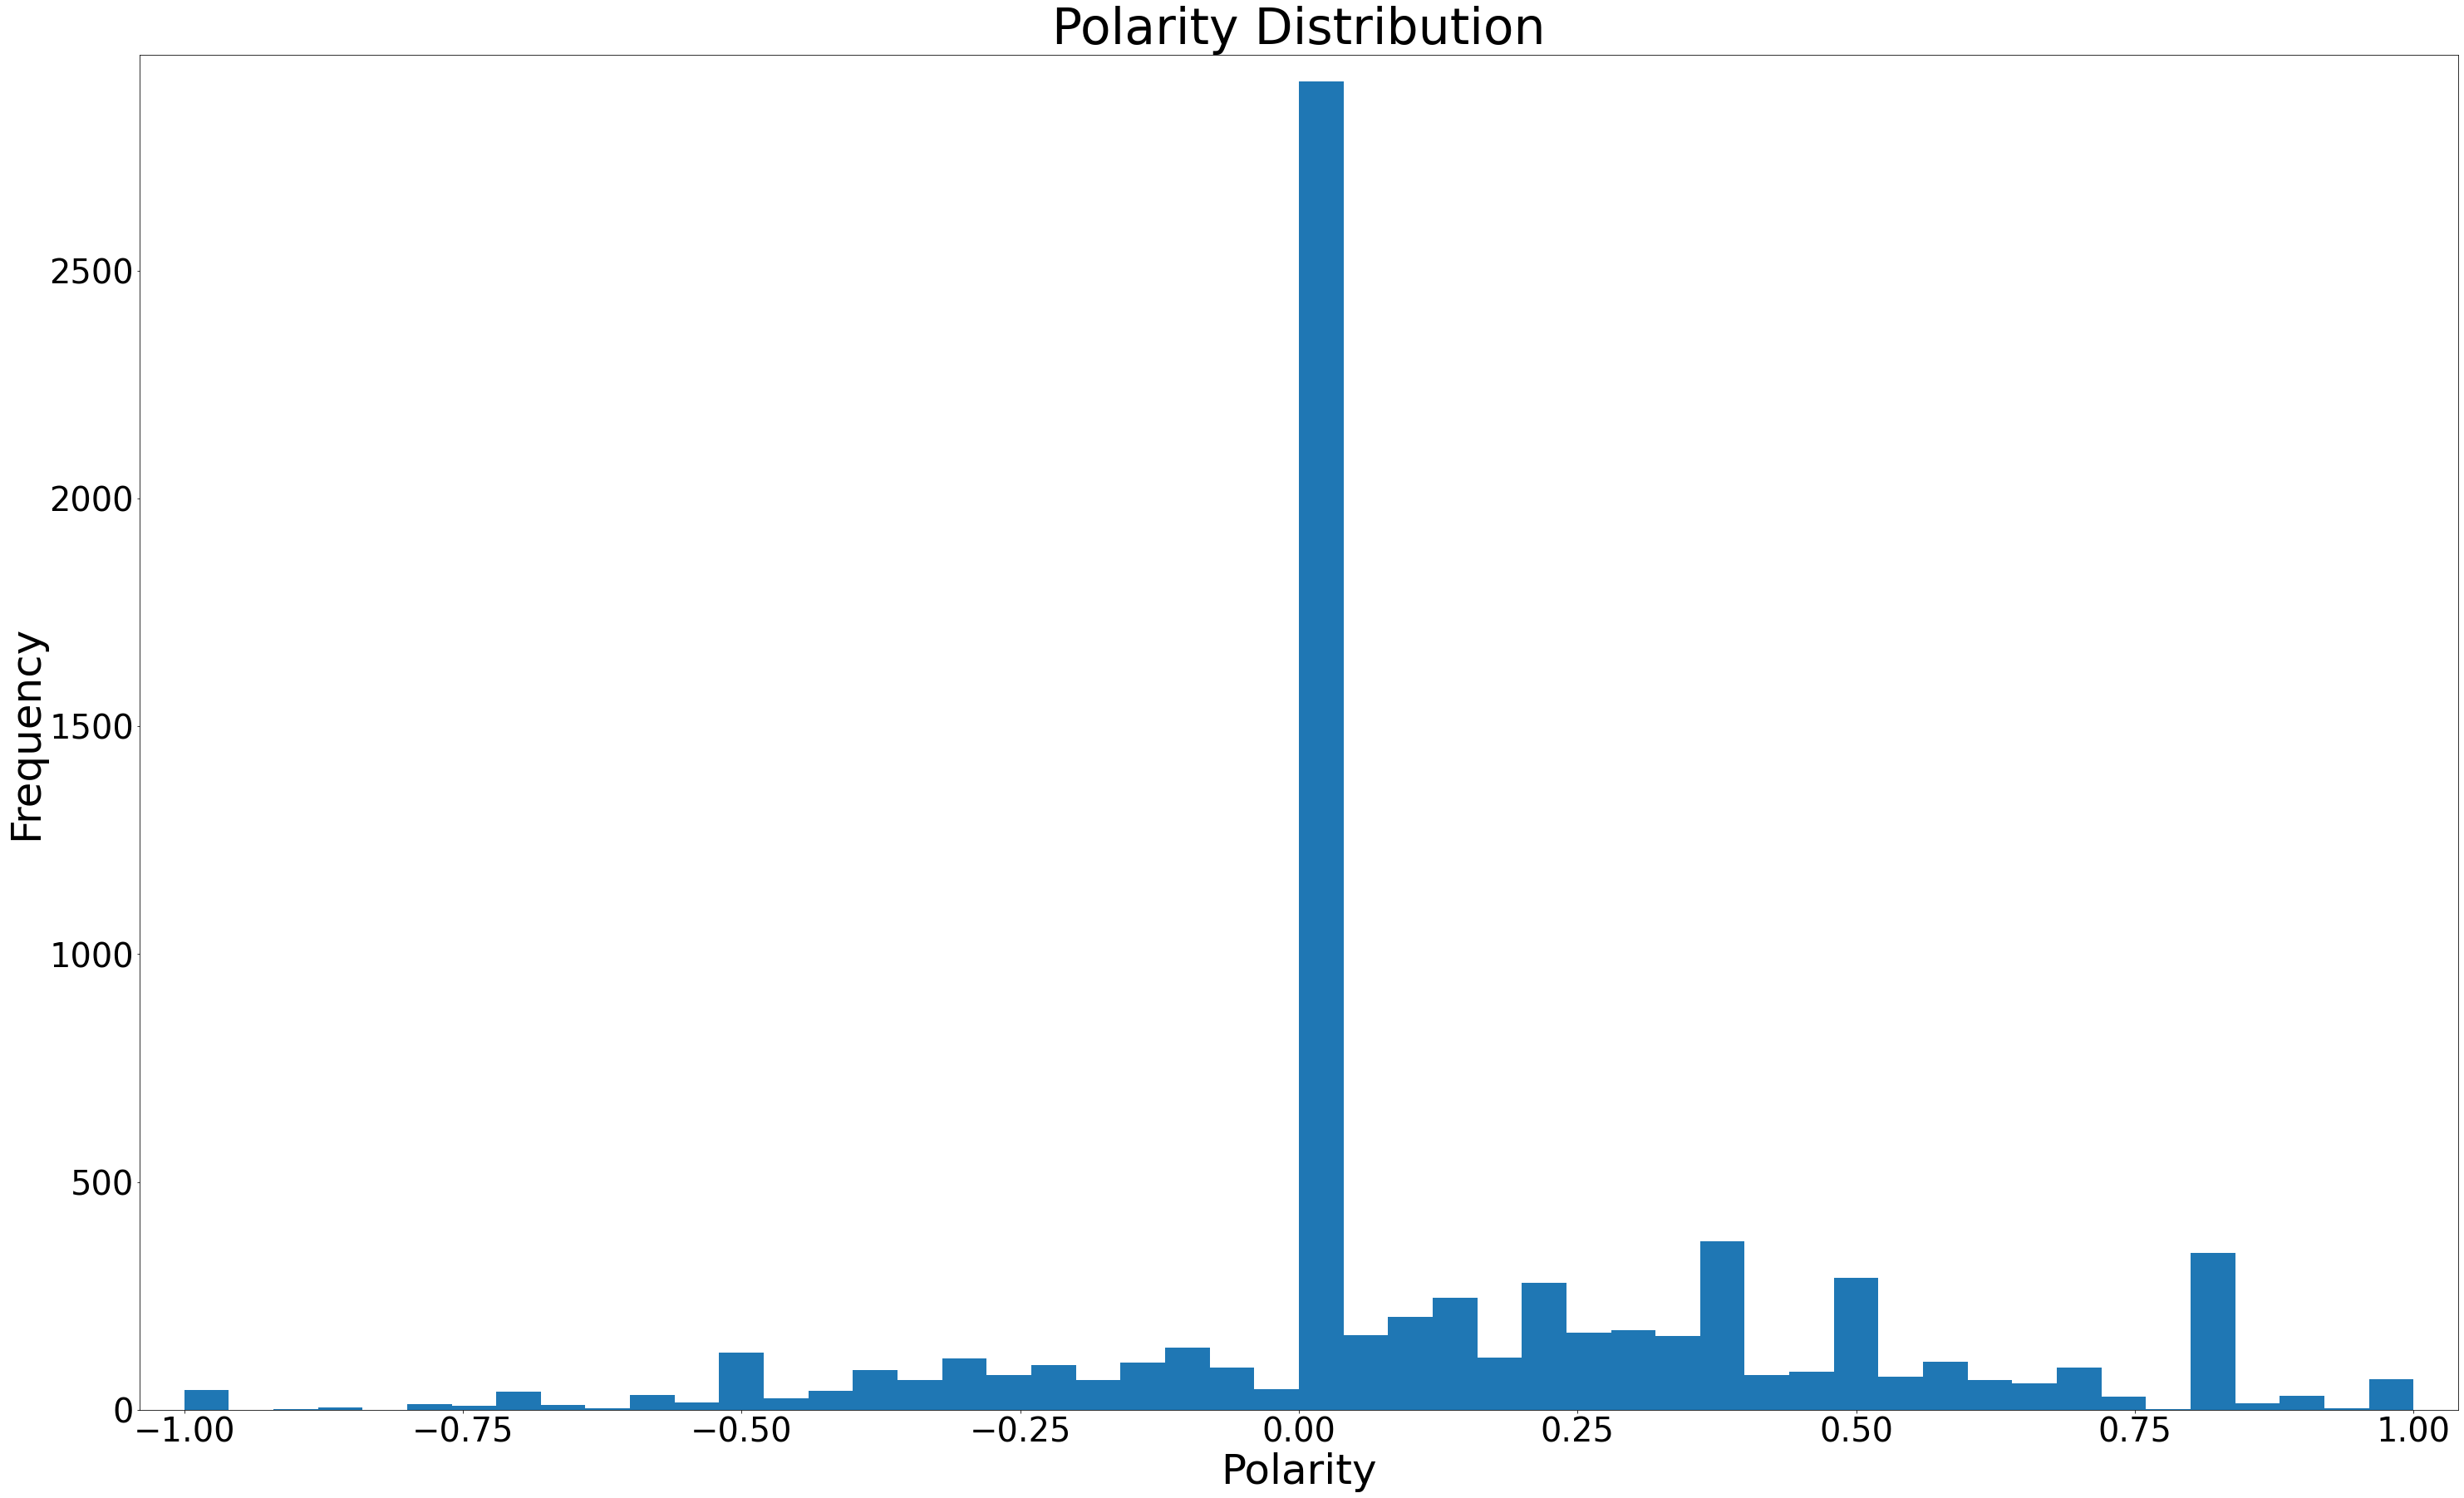

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Polarity', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(tweet['polarity'], bins = 50)
plt.title('Polarity Distribution', fontsize=60)
plt.show()

**Ques13: Find the number of tweets of each category of polarity (Positive, Negative and Neutral)**

In [39]:
tweet['polarity_encoded'] = ['positive' if x>0 else 'negative' if x<0 else 'neutral' for x in tweet['polarity']]

In [40]:
# Print the number of tweets of each category of polarity
tweet['polarity_encoded'].value_counts()

positive    3278
neutral     2851
negative    1246
Name: polarity_encoded, dtype: int64

We can observed that he received more positive and neutral comments rather than negative commentswhich shows that his actions were appreciated by people of U.S.

**Ques14: Build ML model and calculate the accuracy**

In [41]:
tweet.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,sentiment_score,polarity,polarity_encoded
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,"(0.0, 0.0)",0.000000,neutral
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,"(0.2681818181818182, 0.7272727272727273)",0.268182,positive
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,"(0.3375, 0.5541666666666667)",0.337500,positive
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,"(0.0875, 0.6375)",0.087500,positive
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,"(0.5875, 0.6208333333333333)",0.587500,positive


In [42]:
new_df = tweet.drop(columns=['sentiment_score','polarity'],axis=1)
new_df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,cleaned_text,processed_text,stemmedtext(porter),stemmedtext(lancester),stemmedtext(snowball),lemmatext,lemma_str,word_count,review_len,polarity_encoded
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,deepest gratitude served armed forces ThankAVe...,deepest gratitude served armed forces thankave...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitud serv arm forc thankavet tcowp...,deepest gratitude served armed force thankavet...,d e e p e s t g r a t i t u d e s e r v e ...,7,119,neutral
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,New York soon making important decisions peopl...,new york soon making important decisions peopl...,new york soon make import decis peopl run govern,new york soon mak import decid peopl run govern,new york soon make import decis peopl run govern,new york soon making important decision people...,n e w y o r k s o o n m a k i n g i m ...,9,129,positive
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,small groups protesters last night passion gre...,small groups protesters last night passion gre...,small group protest last night passion great c...,smal group protest last night pass gre country...,small group protest last night passion great c...,small group protester last night passion great...,s m a l l g r o u p p r o t e s t e r l ...,11,147,positive
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,open successful presidential election professi...,open successful presidential election professi...,open success presidenti elect profession prote...,op success presid elect profess protest incit ...,open success presidenti elect profession prote...,open successful presidential election professi...,o p e n s u c c e s s f u l p r e s i d e ...,10,185,positive
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,DC Met President Obama first time Really good ...,dc met president obama first time really good ...,dc met presid obama first time realli good mee...,dc met presid obam first tim real good meet gr...,dc met presid obama first time realli good mee...,dc met president obama first time really good ...,d c m e t p r e s i d e n t o b a m a ...,15,179,positive


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True,ngram_range = (1,1),stop_words='english')

In [44]:
X = tweet['processed_text']
y = tweet['polarity_encoded']

In [45]:
X_vect = vectorizer.fit_transform(X)
df_vect = pd.DataFrame(X_vect.toarray(),columns=vectorizer.get_feature_names())
print(df_vect.head())
print(df_vect.shape)


    00  007llisav  00patriot   08  08102015  ...  zuckermans  ωtime   ԍԍ  ԏԏԏ   լլ
0  0.0        0.0        0.0  0.0       0.0  ...         0.0    0.0  0.0  0.0  0.0
1  0.0        0.0        0.0  0.0       0.0  ...         0.0    0.0  0.0  0.0  0.0
2  0.0        0.0        0.0  0.0       0.0  ...         0.0    0.0  0.0  0.0  0.0
3  0.0        0.0        0.0  0.0       0.0  ...         0.0    0.0  0.0  0.0  0.0
4  0.0        0.0        0.0  0.0       0.0  ...         0.0    0.0  0.0  0.0  0.0

[5 rows x 11778 columns]
(7375, 11778)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_vect,y,test_size=0.20,random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5900, 11778)
(1475, 11778)
(5900,)
(1475,)


In [47]:
del X_vect
del df_vect

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import cross_val_score,KFold

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('knn', KNeighborsClassifier()))

models.append(('Random Forest', RandomForestClassifier()))


for name,model in models:
  kfold = KFold(n_splits=5,random_state=7)
  cross_val_sc=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kfold)
  print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

knn : acc: 0.3996610169491525(standard deviation: 0.016568609369288043)
Random Forest : acc: 0.8238983050847457(standard deviation: 0.01143785275851051)


**Ques15: Find the most positive and most negative tweet using polarity score**

In [50]:
print("The most positive tweet:",tweet.iloc[tweet['polarity'].idxmax()]['processed_text'])
print("The most negative tweet:",tweet.iloc[tweet['polarity'].idxmin()]['processed_text'])

The most positive tweet: thank law enforcement officers vpdebate police officers best us mikepence
The most negative tweet: lead border securityno solutions ideas credibilityshe supported nafta worst deal us history debate


**Ques16: Find the parts of speech (POS) for most positive and most negative tweet**

In [51]:
sent = tweet.iloc[tweet['polarity'].idxmax()]['processed_text']
sent_tokens = word_tokenize(sent)

In [52]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))

[('thank', 'NN')]
[('law', 'NN')]
[('enforcement', 'NN')]
[('officers', 'NNS')]
[('vpdebate', 'NN')]
[('police', 'NNS')]
[('officers', 'NNS')]
[('best', 'JJS')]
[('us', 'PRP')]
[('mikepence', 'NN')]


In [53]:
sent = tweet.iloc[tweet['polarity'].idxmin()]['processed_text']
sent_tokens = word_tokenize(sent)

In [54]:
for token in sent_tokens:
  print(nltk.pos_tag([token]))

[('lead', 'NN')]
[('border', 'NN')]
[('securityno', 'NN')]
[('solutions', 'NNS')]
[('ideas', 'NNS')]
[('credibilityshe', 'NN')]
[('supported', 'VBN')]
[('nafta', 'NN')]
[('worst', 'JJS')]
[('deal', 'NN')]
[('us', 'PRP')]
[('history', 'NN')]
[('debate', 'NN')]


**Ques17: Apply Named Entity Recognition (NER) for most positive and most negative write your inference**

NER is a method of associating the named entities to their appropriate types

It also helps in automatic identificaton and counting of occurances of named entities in a collection of information 

In [55]:
from nltk import ne_chunk
ne_sent = tweet.iloc[tweet['polarity'].idxmax()]['processed_text']
ne_tokens = word_tokenize(ne_sent)
ne_tags = nltk.pos_tag(ne_tokens)
ne_ner = ne_chunk(ne_tags)
print(ne_ner)

(S
  thank/NN
  law/NN
  enforcement/NN
  officers/NNS
  vpdebate/VBP
  police/NNS
  officers/NNS
  best/VBP
  us/PRP
  mikepence/NN)


In [56]:
from nltk import ne_chunk
ne_sent = tweet.iloc[tweet['polarity'].idxmin()]['processed_text']
ne_tokens = word_tokenize(ne_sent)
ne_tags = nltk.pos_tag(ne_tokens)
ne_ner = ne_chunk(ne_tags)
print(ne_ner)

(S
  lead/JJ
  border/NN
  securityno/JJ
  solutions/NNS
  ideas/NNS
  credibilityshe/VBP
  supported/VBD
  nafta/JJ
  worst/JJS
  deal/VB
  us/PRP
  history/NN
  debate/NN)
